In [7]:
%run -i env_default.py

[autoreload of cv2 failed: Traceback (most recent call last):
  File "/home/waywaybao_cs10/anaconda3/envs/roi/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/waywaybao_cs10/anaconda3/envs/roi/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/waywaybao_cs10/anaconda3/envs/roi/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/waywaybao_cs10/anaconda3/envs/roi/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/waywaybao_cs10/anaconda3/envs/roi/lib/python3.6/site-packages/cv2/__init__.py", line 181, in <module>
   

In [8]:
%run -i src/notebook_base_light.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from src.datasets.dataset import DatasetImageDir
dset = DatasetImageDir(dir_root='data/joint_pipeline_example')
dset.discover()

Discovered 2 frames - DatasetImageDir(2 frames, data/joint_pipeline_example, s=nosplit)


In [10]:
from src.a05_differences.E1_article_evaluation import DiscrepancyJointPipeline
joint_pipeline = DiscrepancyJointPipeline()
joint_pipeline.init_semseg()
joint_pipeline.init_gan()
joint_pipeline.init_discrepancy()
# speed up the calculation by using half-precision
# joint_pipeline.init_apex_optimization()
# change batch size if there is not enough GPU memory
# joint_pipeline.set_batch_size(2)

Loading checkpoint found at exp/0121_PSPEns_BDD_00/chk_best.pth
Building net
Loading weights from checkpoint
Loading checkpoint found at exp/0521_Diff_SwapFgd_ImgAndLabelVsGen_semGT/chk_best.pth
Building net


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/waywaybao_cs10/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 117MB/s]  


Loading weights from checkpoint


/home/waywaybao_cs10/anaconda3/envs/roi/lib/python3.6/site-packages/torch/nn/functional.py:3455: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)



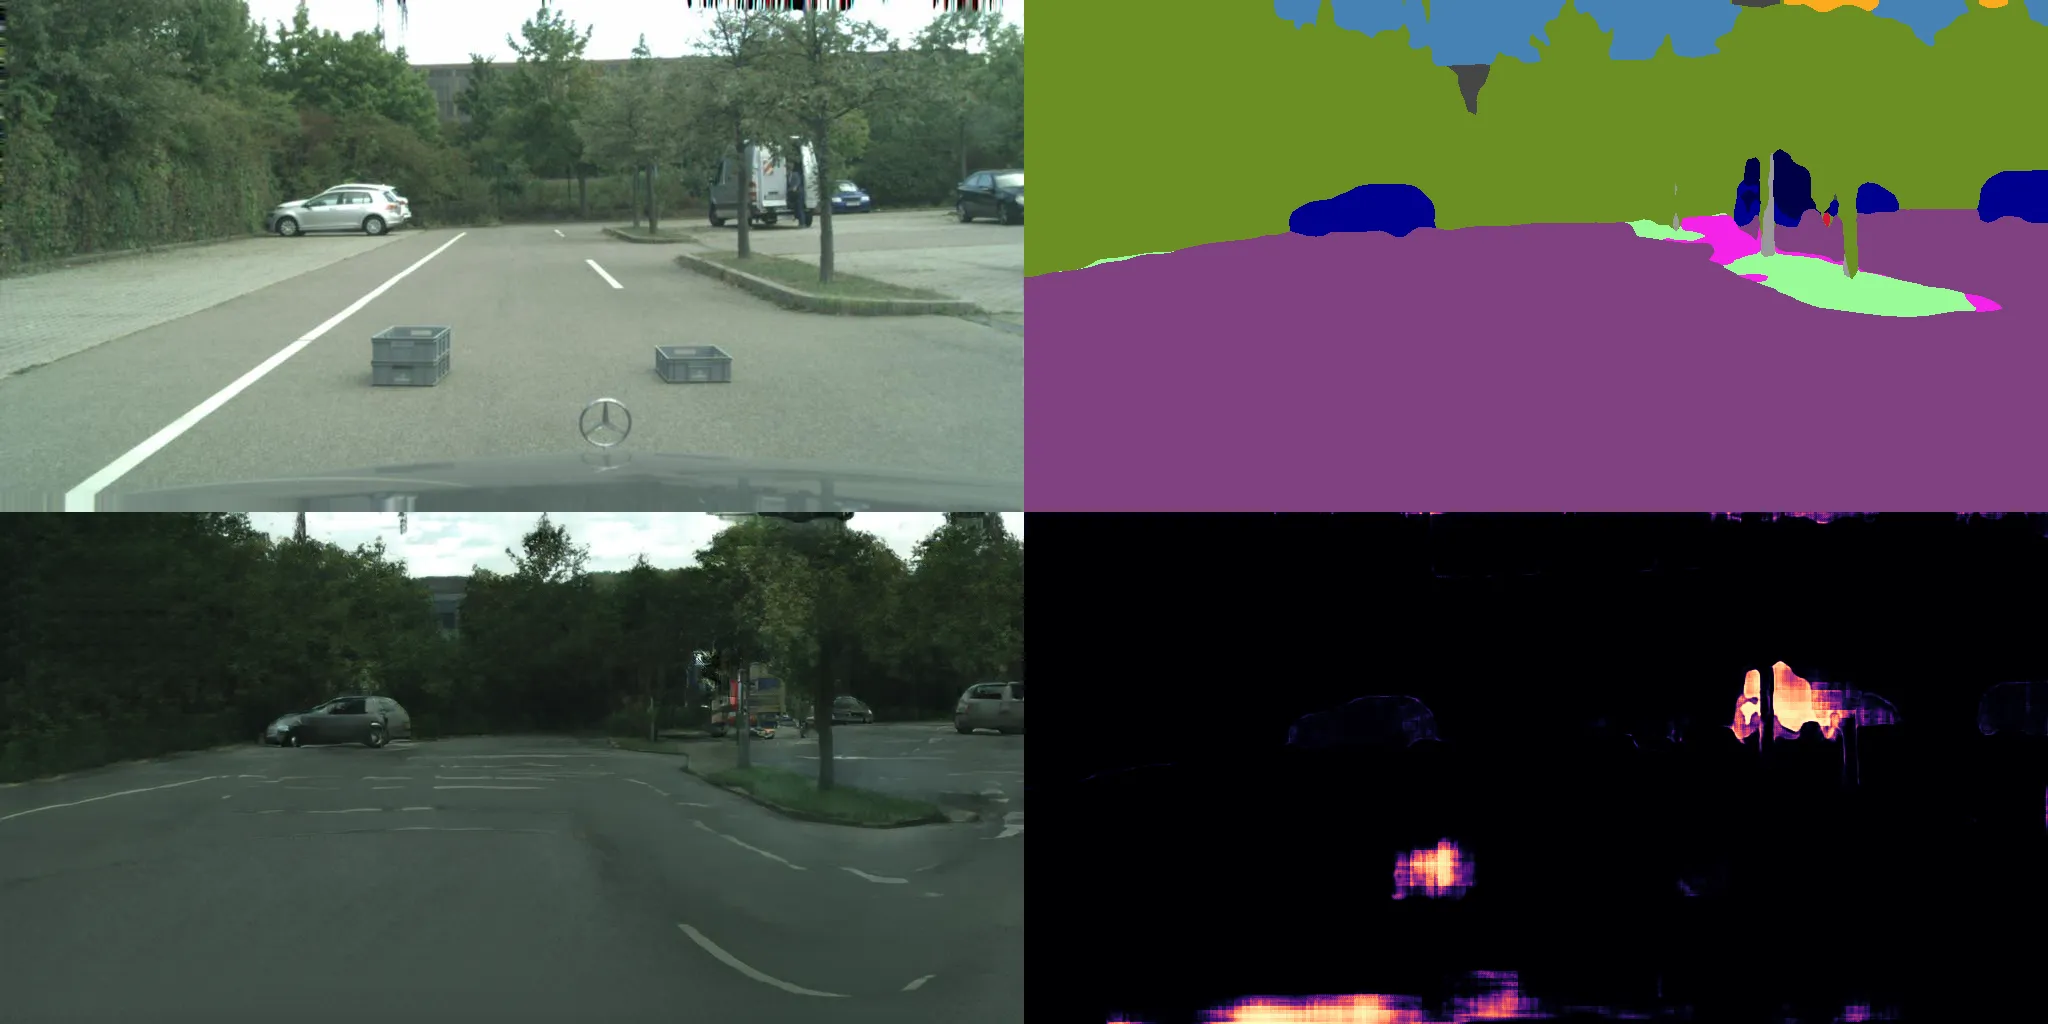


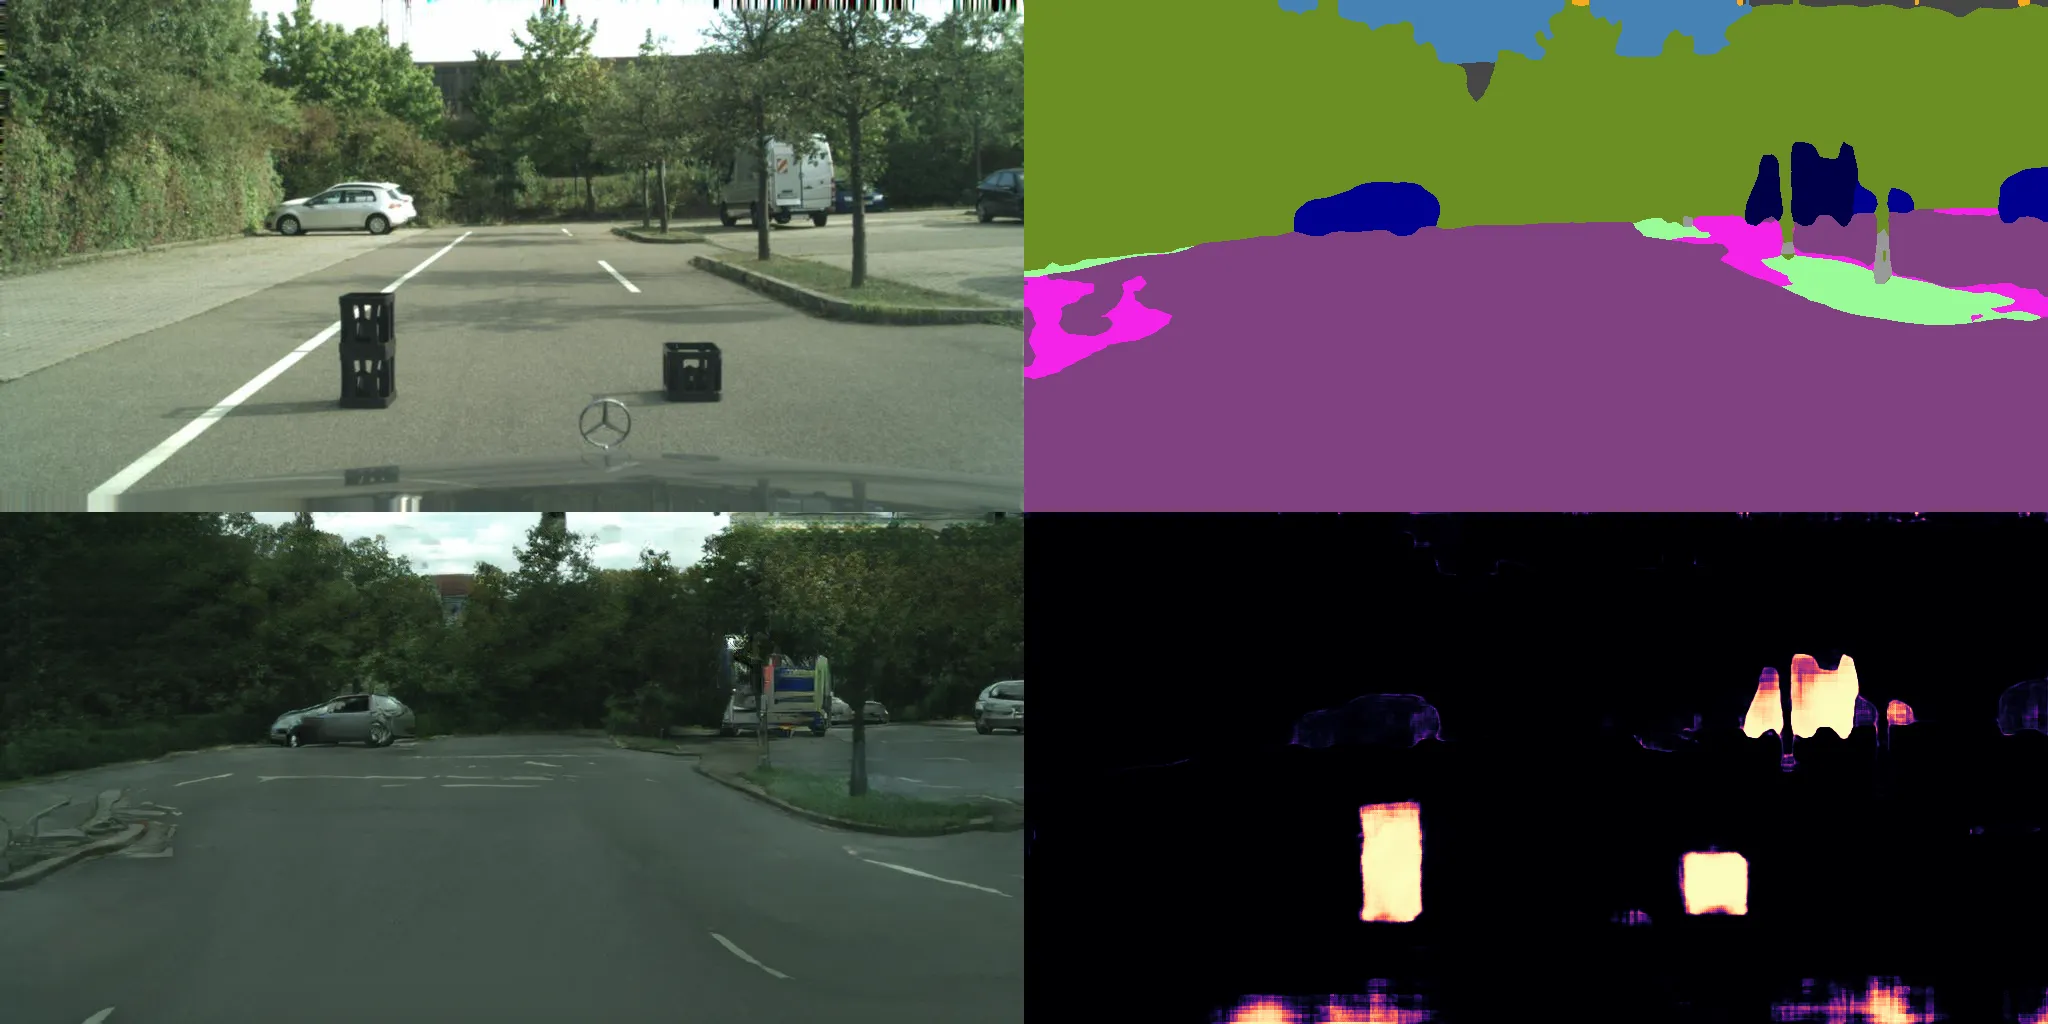

In [11]:
# run and show results in notebook
joint_pipeline.run_on_dset(dset, b_show=True)

In [12]:
# run and show, write the output images
joint_pipeline.run_on_dset(dset, b_show=False)

100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


In [13]:
# Alternative pipeline without the image generator
from src.a05_differences.E1_article_evaluation import DiscrepancyJointPipeline_LabelsOnly
joint_pipeline_lab = DiscrepancyJointPipeline_LabelsOnly()
joint_pipeline_lab.init_semseg()
joint_pipeline_lab.init_discrepancy()

Loading checkpoint found at exp/0121_PSPEns_BDD_00/chk_best.pth
Building net
Loading weights from checkpoint
Loading checkpoint found at exp/0517_Diff_SwapFgd_ImgVsLabels_semGT/chk_best.pth
Building net
Loading weights from checkpoint


In [14]:
from src.datasets.road_anomaly import DatasetRoadAnomaly
dset_road_anomaly = DatasetRoadAnomaly()
dset_road_anomaly.discover()
joint_pipeline_lab.run_on_dset(dset, b_show=True)

FileNotFoundError: [Errno 2] No such file or directory: '/cvlabsrc1/cvlab/dataset_RoadAnomaly/frame_list.json'

In [ ]:
joint_pipeline_lab.run_on_dset(dset, b_show=False)